In [228]:
#import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

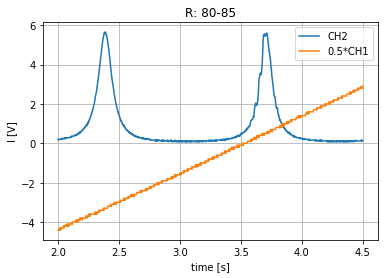

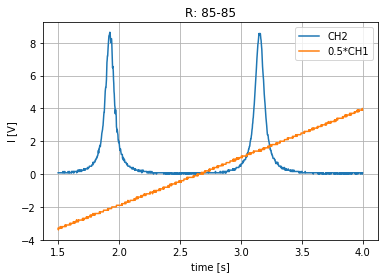

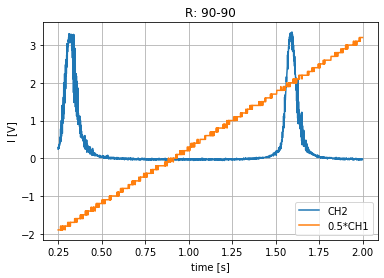

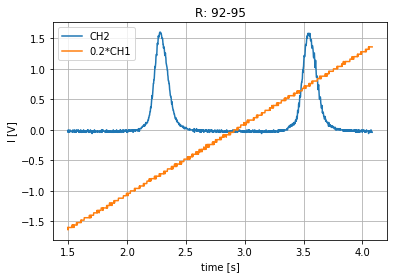

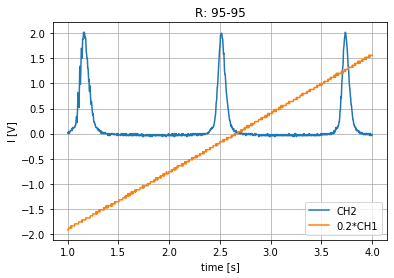

In [229]:
name = ['8085.csv','8585.csv','9090.csv','9295.csv','9595.csv']
title = ['R: 80-85','R: 85-85','R: 90-90','R: 92-95','R: 95-95']
norm = [0.5,0.5,0.5,0.2,0.2]

for n in range(len(name)):
    df = pd.read_csv(name[n])
    tc = np.asarray(df.iloc[:,0])
    CH1c  = np.asarray(df.iloc[:,1])
    CH2c  = np.asarray(df.iloc[:,2])
    plt.plot(tc,CH2c,label  = 'CH2')
    plt.plot(tc,norm[n]*CH1c,label = '{}*CH1'.format(norm[n]))
    
    plt.title(title[n])
    plt.xlabel('time [s]')
    plt.ylabel('I [V]')
    plt.legend()
    plt.grid()
    plt.show()
    

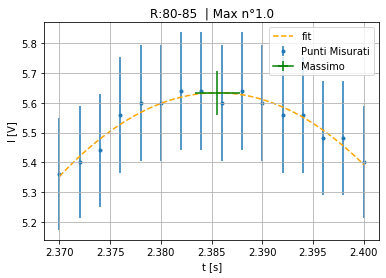

Xmax = 2.3855695371217736 +- 0.002252340961560454 [s]
Ymax = 5.633924146285598 +- 0.07355346211060583 [V]


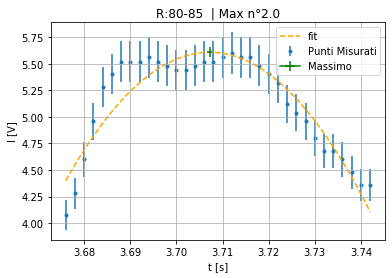

Xmax = 3.7072049548800714 +- 0.0005916726722783197 [s]
Ymax = 5.607733319598282 +- 0.048234065162641684 [V]


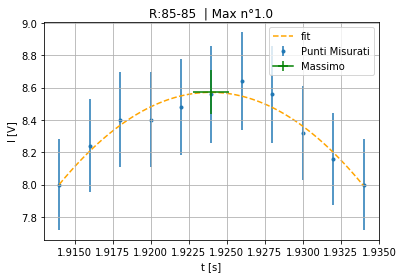

Xmax = 1.9239585809193194 +- 0.0011853359898901517 [s]
Ymax = 8.570811308219598 +- 0.13513893946158864 [V]


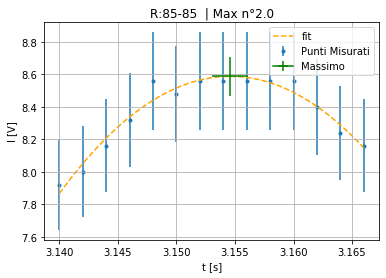

Xmax = 3.154596084372791 +- 0.0015478729664413656 [s]
Ymax = 8.588043103942104 +- 0.11808132134889919 [V]


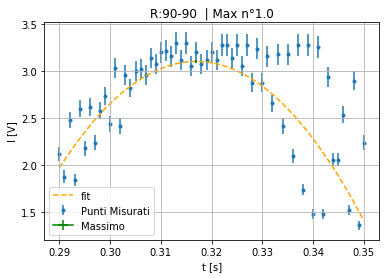

Xmax = 0.3169888332355203 +- 0.00019968382037769653 [s]
Ymax = 3.104830993901568 +- 0.019486201338039136 [V]


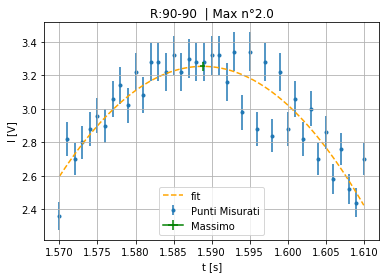

Xmax = 1.5888379884293442 +- 0.00035420444186093526 [s]
Ymax = 3.253411241404356 +- 0.025652762475408097 [V]


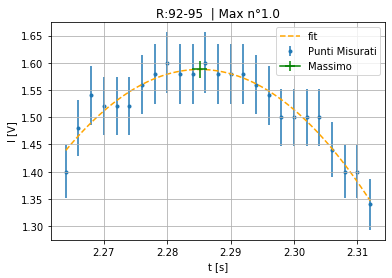

Xmax = 2.285111569603938 +- 0.0011776974549218516 [s]
Ymax = 1.5876958823883927 +- 0.016102689759463218 [V]


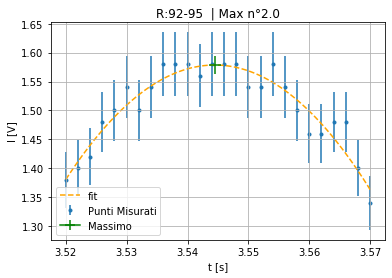

Xmax = 3.544470032218734 +- 0.0009997725057488529 [s]
Ymax = 1.5785454607592648 +- 0.01590686766626324 [V]


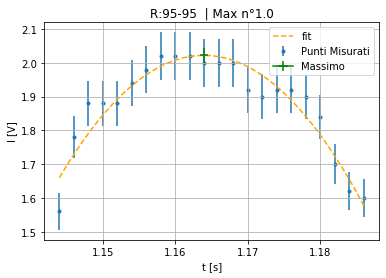

Xmax = 1.1639214959895832 +- 0.0005746708939789299 [s]
Ymax = 2.0222042658856902 +- 0.02174419429101817 [V]


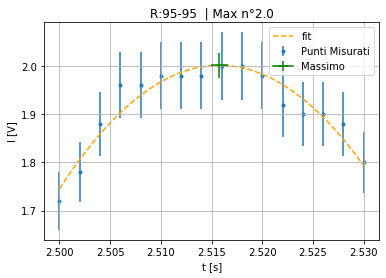

Xmax = 2.515775710903524 +- 0.0008680812285283535 [s]
Ymax = 2.0013032671698734 +- 0.025727079294359367 [V]


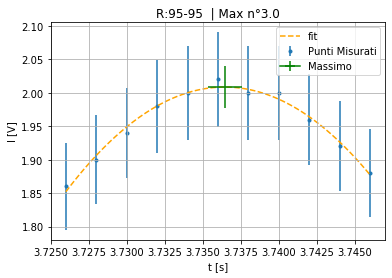

Xmax = 3.736437878137672 +- 0.0011188002884922044 [s]
Ymax = 2.008705731915969 +- 0.0316189000355104 [V]


In [230]:
def fit_func(x,a,b,c):
    return -a*(x-b)**2 + c
AAA  = pd.read_csv('datafit.csv')
t = np.asarray(AAA.iloc[:,0])
CH1  = np.asarray(AAA.iloc[:,1])
CH2  = np.asarray(AAA.iloc[:,2])

i = 0
while i < len(t):
    X = np.asarray([])   
    Y = np.asarray([])                        
    while t[i] != CH2[i]:
        X = np.append(X,t[i])  
        Y = np.append(Y,CH2[i]) 
        i = i + 1;
    #print(Y)

    sY = 0.035*Y
    [a,b,c],pcov = s.optimize.curve_fit(fit_func,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = ([0,0,0],[10000,5,10]))
    #[a,b,c],pcov = s.optimize.curve_fit(fit_func,X,Y,sigma = sY,absolute_sigma = True)
    
    [sa,sb,sc] = np.sqrt(np.diag(pcov))

    xMax = b
    sxMax = sb
    yMax = c
    syMax = sc

    #Plot
    plt.errorbar(X,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    x = np.linspace(np.min(X),np.max(X),100)
    y = fit_func(x,a,b,c)
    plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)
    plt.errorbar(xMax,yMax,yerr=syMax, xerr=sxMax, label = 'Massimo',color = 'g',zorder = 2)
    plt.title('R:{}  | Max n°{}'.format(CH1[i],t[i]/1000))
    plt.ylabel('I [V]')
    plt.xlabel('t [s]')
    plt.grid()
    plt.legend()
    plt.show()
    print('Xmax =',xMax,'+-',sxMax,'[s]')
    print('Ymax =',yMax,'+-',syMax,'[V]')
    #print(a,b,c)
    i = i + 1;

In [231]:
#Array = pd.DataFrame({'t[s]':t,'CH1':CH1,'CH2':CH2})
#pd.DataFrame(Array).to_csv(csv_name,index=False)